In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Loss plot
data=np.genfromtxt('px4_rl_output_loss.txt', delimiter='\t')
print(np.size(data,0))
print(data)


1606
[ 11.592  34.817   1.029 ...  39.486  26.148 -23.832]


<function matplotlib.pyplot.show(close=None, block=None)>

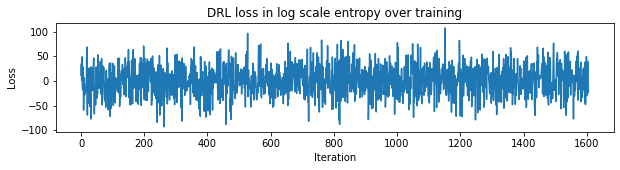

In [3]:
t=range(np.size(data,0))
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("DRL loss in log scale entropy over training")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(t,data)
plt.show


In [40]:
#Observation example
data=np.genfromtxt('px4_rl_observation1200_0.txt', delimiter='\t')
print(np.size(data,0))
print(np.size(data,1))
print(data[0])

1201
51
[-7.000e-03 -1.700e-02 -6.100e-02  2.700e-02 -1.000e-02  1.000e-03
  7.100e-02 -4.400e-02 -1.561e+00  9.000e-02 -3.200e-02  3.000e-03
 -1.300e-02  4.300e-02  7.200e-02  9.960e-01  9.000e-02 -3.200e-02
  3.000e-03 -2.100e-02 -2.500e-02 -7.000e-03  1.000e-03  2.500e-02
 -1.200e-02  4.140e-01  4.100e-01  4.060e-01  4.420e-01  2.400e-02
  5.030e-01  7.000e-01  1.200e-02 -1.400e-02  4.900e-02  9.100e-02
  9.950e-01  7.600e-02 -2.700e-02  2.000e-03  7.090e-01  2.300e-02
  1.200e-02  5.000e-03  2.100e-02  1.000e-03  2.700e-02 -1.200e-02
  2.000e-02  7.000e-03        nan]


<function matplotlib.pyplot.show(close=None, block=None)>

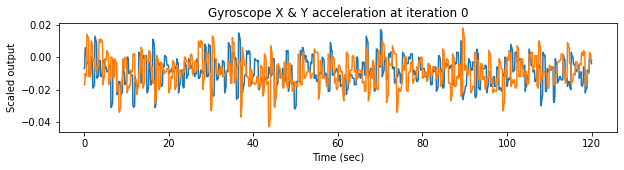

In [43]:
i=range(np.size(data,0))
t=np.array(i)/10
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("Gyroscope X & Y acceleration at iteration 0")
plt.xlabel("Time (sec)")
plt.ylabel("Scaled output")
plt.plot(t,data[:,0])
plt.plot(t,data[:,1])
plt.show


1201
9
[1.65  0.005 0.3   1.65  0.005 0.3   1.65  0.22    nan]


<function matplotlib.pyplot.show(close=None, block=None)>

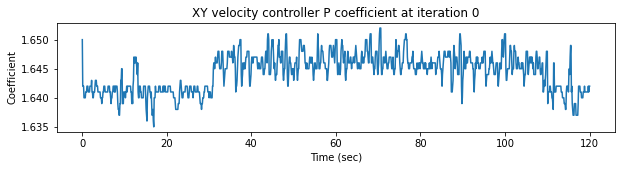

In [7]:
#Action at 0 and 1000
data=np.genfromtxt('px4_rl_action1200_0.txt', delimiter='\t')
print(np.size(data,0))
print(np.size(data,1))
print(data[0])
i=range(np.size(data,0))
t=np.array(i)/10
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("XY velocity controller P coefficient at iteration 0")
plt.xlabel("Time (sec)")
plt.ylabel("Coefficient")
plt.plot(t,data[:,0])
#plt.plot(t,data[:,12])
#plt.plot(t,data[:,13])
plt.show


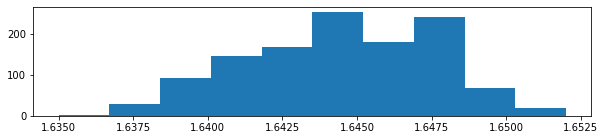

In [11]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.hist(data[:,0], bins=10)
#plt.hist(data[:,12], bins=50)
#plt.hist(data[:,13], bins=50)
plt.show() 

1201
9
[1.653 0.005 0.299 1.66  0.005 0.301 1.655 0.219   nan]


<function matplotlib.pyplot.show(close=None, block=None)>

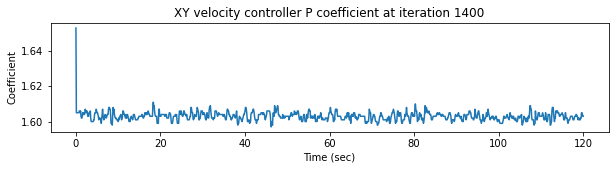

In [13]:
#Action at 0 and 1000
data=np.genfromtxt('px4_rl_action1200_1400.txt', delimiter='\t')
print(np.size(data,0))
print(np.size(data,1))
print(data[0])
i=range(np.size(data,0))
t=np.array(i)/10
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("XY velocity controller P coefficient at iteration 1400")
plt.xlabel("Time (sec)")
plt.ylabel("Coefficient")
plt.plot(t,data[:,0])
plt.show


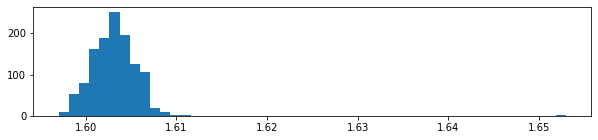

In [14]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.hist(data[:,0], bins=50)
plt.show() 



<function matplotlib.pyplot.show(close=None, block=None)>

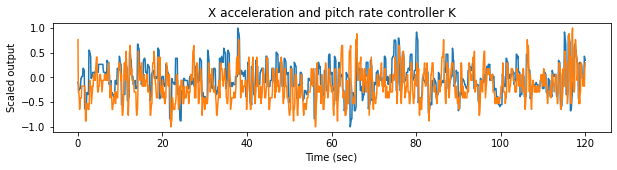

In [45]:
#Correlate action and observation
idx=0
data_=np.genfromtxt('px4_rl_observation1200_1300.txt', delimiter='\t')
#print(data_)
data=data_[:,idx]
#print(data)
max=data.max()
min=data.min()
#print(max)
#print(min)
data1=(data-((max+min)/2)) / (max-min) *2

idx=0
data_=np.genfromtxt('px4_rl_action1200_1300.txt', delimiter='\t')
data=data_[:,idx]
max=data.max()
min=data.min()
data2=(data-((max+min)/2)) / (max-min) *2

i=range(np.size(data,0))
t=np.array(i)/10
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("X acceleration and pitch rate controller K")
plt.xlabel("Time (sec)")
plt.ylabel("Scaled output")
plt.plot(t,data1)
plt.plot(t,data2)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

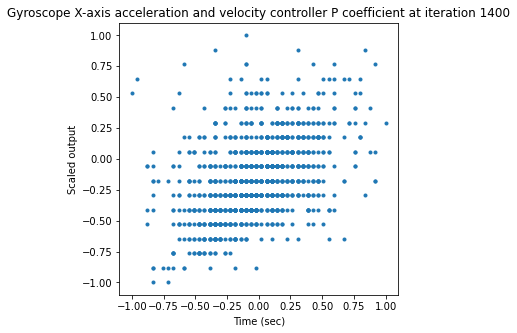

In [25]:
f=plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
plt.title("Gyroscope X-axis acceleration and velocity controller P coefficient at iteration 1400")
plt.xlabel("Time (sec)")
plt.ylabel("Scaled output")
plt.plot(data1,data2,".")
plt.show


0.49745161290322587
0.030608704970631947
0.06153101965434085
1.4697096774193548
0.28701671228720116
0.5769741314378597


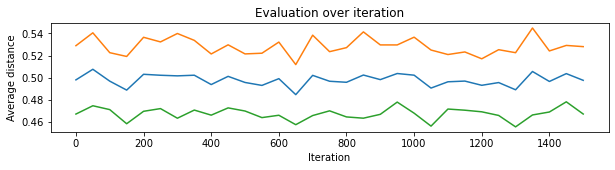

In [35]:
#Evaluation results over time
max_idx=1550
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("Evaluation over iteration")
plt.xlabel("Iteration")
plt.ylabel("Average distance")

t = range(0, max_idx,50)
mean=[]
max=[]
std=[]
for i in range(0, max_idx, 50):
    data_=np.genfromtxt('px4_rl_output1200_%d.txt' % i, delimiter='\t')
    mean.append(data_[:,0].mean())
    std.append(data_[:,0].std())
    max.append(data_[:,1].max())

plt.plot(t,mean)
plt.plot(t,np.array(mean) + np.array(std))
plt.plot(t,np.array(mean) - np.array(std))
#plt.plot(t,max)
plt.show

print(data_[:,0].mean())
print(data_[:,0].std())
print(data_[:,0].std()/data_[:,0].mean())
print(data_[:,1].mean())
print(data_[:,1].std())
print(data_[:,1].std()/data_[:,0].mean())